In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as fun
import torch.optim as sgd

In [62]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [63]:
class simpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad= False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad= False)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad = False)

        self.w10 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad = False)

    def forward(self, input):
        input_to_layer01 = input*self.w00 + self.b00
        layer01_output = fun.sigmoid(input_to_layer01)
        layer01_output = layer01_output * self.w10

        input_to_layer02 = input * self.w01 + self.b01
        layer02_output = fun.sigmoid(input_to_layer02)
        layer02_output = layer02_output * self.w11

        input_to_layer03 = input * self.w02 + self.b02
        layer03_output = fun.sigmoid(input_to_layer03)
        layer03_output = layer03_output * self.w12

        output = layer01_output + layer02_output + layer03_output

        output = fun.tanh(output)
        output = output * self.w20

        return output

In [64]:
simple_nn = simpleNN()


In [65]:
x = torch.linspace(start=1, end=2.5, steps=40)
x

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [66]:
y = simple_nn(x)

In [67]:
y

tensor([0.7002, 0.7012, 0.7023, 0.7033, 0.7043, 0.7053, 0.7063, 0.7072, 0.7081,
        0.7091, 0.7099, 0.7108, 0.7117, 0.7125, 0.7134, 0.7142, 0.7150, 0.7158,
        0.7165, 0.7173, 0.7180, 0.7187, 0.7195, 0.7201, 0.7208, 0.7215, 0.7222,
        0.7228, 0.7234, 0.7241, 0.7247, 0.7253, 0.7259, 0.7264, 0.7270, 0.7275,
        0.7281, 0.7286, 0.7291, 0.7296])

c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

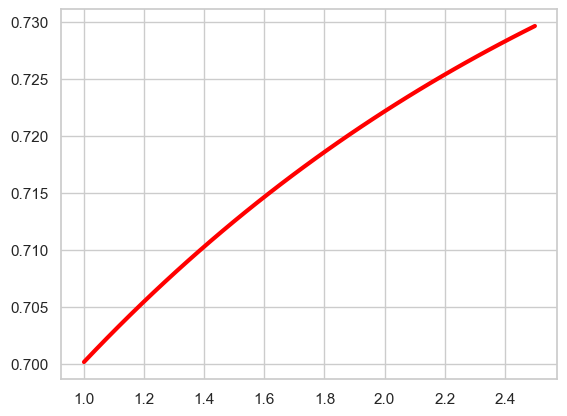

In [68]:
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")
sns.lineplot(
    x=x,
    y=y.detach(),
    linewidth=3,
    color='red'
)



In [69]:
class TrainableNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad= True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad= True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad = True)

        self.w10 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad = True)

    def forward(self, input):
        input_to_layer01 = input*self.w00 + self.b00
        layer01_output = fun.sigmoid(input_to_layer01)
        layer01_output = layer01_output * self.w10

        input_to_layer02 = input * self.w01 + self.b01
        layer02_output = fun.sigmoid(input_to_layer02)
        layer02_output = layer02_output * self.w11

        input_to_layer03 = input * self.w02 + self.b02
        layer03_output = fun.sigmoid(input_to_layer03)
        layer03_output = layer03_output * self.w12

        output = layer01_output + layer02_output + layer03_output

        output = fun.tanh(output)
        output = output * self.w20

        return output
        

In [70]:
trainable_y = TrainableNN()

y = trainable_y(x)

y

tensor([0.3729, 0.3737, 0.3746, 0.3754, 0.3762, 0.3769, 0.3776, 0.3783, 0.3790,
        0.3797, 0.3803, 0.3809, 0.3815, 0.3821, 0.3826, 0.3832, 0.3837, 0.3842,
        0.3847, 0.3852, 0.3856, 0.3861, 0.3865, 0.3869, 0.3873, 0.3877, 0.3881,
        0.3884, 0.3888, 0.3891, 0.3895, 0.3898, 0.3901, 0.3904, 0.3907, 0.3910,
        0.3912, 0.3915, 0.3917, 0.3920], grad_fn=<MulBackward0>)

c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

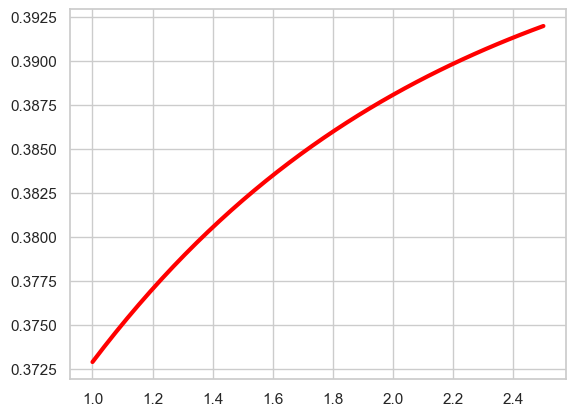

In [71]:
sns.set(style="whitegrid")
sns.lineplot(
    x = x,
    y = y.detach(),
    linewidth = 3,
    color = "red"
)

In [73]:
optimizer = sgd(trainable_y.parameters(), lr = 0.01)
loss = nn.MSELoss()

TypeError: 'module' object is not callable

In [45]:
for epoch in range(50):
    total_loss = 0
    for i in range(len(x)):
        input_i = x[i]
        actual_output = y[i]

        pred_output = trainable_y(input_i)

        loss_value =  loss(pred_output, actual_output)

        loss_value.backward()

        total_loss += loss_value
    
    print(f"epoch number: ${i} total loss: ${total_loss}")
    optimizer.step()
    optimizer.zero_grad()


NameError: name 'loss' is not defined